# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Observations

1. There is a convincing linear relationship between temperature and latitude for both the northern and southern hemisphere plots. For the northern hemisphere plot the temperature decreases as latitude moves further from the equator, and for the southern hemisphere plot the temperature increases as latitude moves further towards the equator. This tells us that max temperature is highest in locations where the latitude is closest to 0. 
2. There is a very weak relationship between humdity and latitude, suggesting that as latitude approaches 0 the humidity decreases slightly, yet once latitude surpasses 0 and humidity increases as the linear regression becomes positive. 
3. There is hardly any correlation between wind speed and latitude. The r-value is so low that we could imply there is no relationship between the variables. 

In [1]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
from config import weather_key
from citipy import citipy
from pprint import pprint

## Generate Cities List

In [2]:
lat_range = (-90, 90)
lng_range = (-180, 180)
latitude_longitudes = []
cities = []

latitude = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
longitude = np.random.uniform(lng_range[0], lng_range[1], size = 1500)

latitude_longitudes = zip(latitude, longitude)

for latitude_longitude in latitude_longitudes: 
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    
    if city not in cities: 
        cities.append(city)
        
city_count = len(cities)
print(city_count)


603


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
country = []
latitude = []
longitude = []
temperature = []
maxtemp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

item = 1

for city in cities:
    query_url = f"{url}appid={weather_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    
    try: 
        print(f"Processing Record {item} | {city}") 
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        
        item += 1
        
    except: 
        print(f"City '{city}' not found...Skipping.")
        

Processing Record 1 | taolanaro
City 'taolanaro' not found...Skipping.
Processing Record 1 | masindi
Processing Record 2 | vaini
Processing Record 3 | chubbuck
Processing Record 4 | hervey bay
Processing Record 5 | manaus
Processing Record 6 | hobart
Processing Record 7 | punta arenas
Processing Record 8 | suluq
Processing Record 9 | havre-saint-pierre
Processing Record 10 | port alfred
Processing Record 11 | bethel
Processing Record 12 | ushuaia
Processing Record 13 | barrow
Processing Record 14 | pevek
Processing Record 15 | iqaluit
Processing Record 16 | la ronge
Processing Record 17 | russell
Processing Record 18 | tuatapere
Processing Record 19 | atuona
Processing Record 20 | bluff
Processing Record 21 | busselton
Processing Record 22 | hilo
Processing Record 23 | makinsk
Processing Record 24 | xam nua
Processing Record 25 | salalah
Processing Record 26 | pisco
Processing Record 27 | cape town
Processing Record 28 | saint-philippe
Processing Record 29 | tir pol
City 'tir pol' not 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature (F)": maxtemp,
    "Humidity (%)": humidity, 
    "Cloudiness (%)": cloudiness, 
    "Wind Speed (mph)": wind_speed,
    "Date": date
}

weather_df = pd.DataFrame(weather_dict)
weather_df = weather_df.dropna()

#export to csv (check notes from activities)
weather_df.to_csv("C:/Users/LilyG/python_api_challenge/weather_df.csv", encoding="utf-8", index=False)

In [5]:
weather_df.describe()

,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.169449,18.702096,62.771989,68.721137,56.056838,7.694369,1.603116e+09
std,32.790230,89.833716,21.626742,23.137959,41.452159,5.806866,5.407734e+01
min,-54.800000,-175.200000,6.550000,5.000000,0.000000,0.510000,1.603115e+09
25%,-7.295000,-59.130000,46.000000,57.000000,5.000000,3.360000,1.603116e+09
50%,20.890000,22.220000,66.000000,74.000000,67.000000,6.170000,1.603116e+09
75%,47.225000,98.920000,80.010000,86.000000,100.000000,10.510000,1.603116e+09
max,78.220000,179.320000,105.800000,100.000000,100.000000,45.630000,1.603116e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.describe()

,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.169449,18.702096,62.771989,68.721137,56.056838,7.694369,1.603116e+09
std,32.790230,89.833716,21.626742,23.137959,41.452159,5.806866,5.407734e+01
min,-54.800000,-175.200000,6.550000,5.000000,0.000000,0.510000,1.603115e+09
25%,-7.295000,-59.130000,46.000000,57.000000,5.000000,3.360000,1.603116e+09
50%,20.890000,22.220000,66.000000,74.000000,67.000000,6.170000,1.603116e+09
75%,47.225000,98.920000,80.010000,86.000000,100.000000,10.510000,1.603116e+09
max,78.220000,179.320000,105.800000,100.000000,100.000000,45.630000,1.603116e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
under100_humidity_df = weather_df[weather_df["Humidity (%)"] <= 100]
under100_humidity_df
#double checking there were no cities with humidity over 100. 

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Masindi,UG,1.67,31.71,75.11,75,52,4.29,1603115679
1,Vaini,TO,-21.20,-175.20,70.84,79,36,19.08,1603115679
2,Chubbuck,US,42.92,-112.47,52.00,60,100,1.99,1603115679
3,Hervey Bay,AU,-25.30,152.85,70.00,90,29,1.01,1603115680
4,Manaus,BR,-3.10,-60.02,91.81,51,66,2.13,1603115680
...,...,...,...,...,...,...,...,...,...
558,Beloha,MG,-25.17,45.05,85.06,36,0,14.99,1603115772
559,Albania,AL,41.00,20.00,69.80,43,0,8.05,1603115772
560,Camaná,PE,-16.62,-72.71,65.97,65,55,10.25,1603115772
561,Ardeşen,TR,41.19,40.99,70.93,75,100,6.71,1603115772


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [9]:
city_data = weather_df
city_data

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Masindi,UG,1.67,31.71,75.11,75,52,4.29,1603115679
1,Vaini,TO,-21.20,-175.20,70.84,79,36,19.08,1603115679
2,Chubbuck,US,42.92,-112.47,52.00,60,100,1.99,1603115679
3,Hervey Bay,AU,-25.30,152.85,70.00,90,29,1.01,1603115680
4,Manaus,BR,-3.10,-60.02,91.81,51,66,2.13,1603115680
...,...,...,...,...,...,...,...,...,...
558,Beloha,MG,-25.17,45.05,85.06,36,0,14.99,1603115772
559,Albania,AL,41.00,20.00,69.80,43,0,8.05,1603115772
560,Camaná,PE,-16.62,-72.71,65.97,65,55,10.25,1603115772
561,Ardeşen,TR,41.19,40.99,70.93,75,100,6.71,1603115772


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

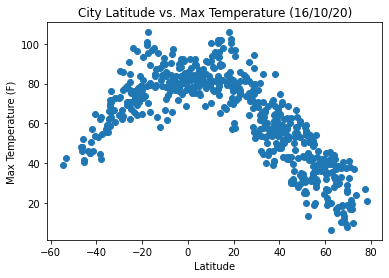

Each marker on this plot represents the Latitude and Max Temperature values of one particular city.
When all markers are plotted, the figure demononstrates the relationship betwen Latitude and Max Temperature.
Based soley on visual observation of the figure, it appears that Max Temperature increases as Latitude gets closer to the equator


<Figure size 432x288 with 0 Axes>

In [10]:
x_values = city_data["Latitude"]
y_values = city_data["Max Temperature (F)"]
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Max Temperature (16/10/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
plt.savefig('Latitude vs Temperature')
print(f"Each marker on this plot represents the Latitude and Max Temperature values of one particular city.")
print(f"When all markers are plotted, the figure demononstrates the relationship betwen Latitude and Max Temperature.")
print(f"Based soley on visual observation of the figure, it appears that Max Temperature increases as Latitude gets closer to the equator")

## Latitude vs. Humidity Plot

Each marker on this plot represents the Latitude and Humidity values of one particular city.
When all markers are plotted, the figure demononstrates the relationship betwen Latitude and Humidity.
Based soley on visual observation of the figure, there doesnt appear to be any visible trend.


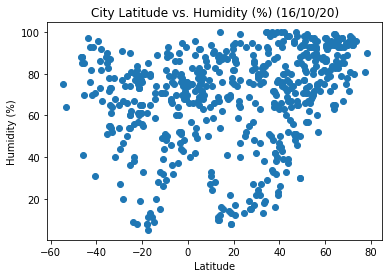

In [11]:
x_values = city_data["Latitude"]
y_values = city_data["Humidity (%)"]
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Humidity (%) (16/10/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show
plt.savefig('Latitude vs Humidity')
print(f"Each marker on this plot represents the Latitude and Humidity values of one particular city.")
print(f"When all markers are plotted, the figure demononstrates the relationship betwen Latitude and Humidity.")
print(f"Based soley on visual observation of the figure, there doesnt appear to be any visible trend.")

## Latitude vs. Cloudiness Plot

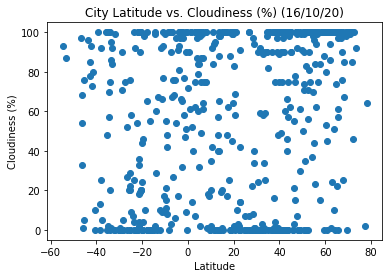

Each marker on this plot represents the Latitude and Cloudiness values of one particular city.
When all markers are plotted, the figure demononstrates the relationship betwen Latitude and Cloudiness.
Based soley on visual observation of the figure, there doesnt appear to be any visible trend. However there appears to less variation in cloudiness at Latitude -60 and 80.


<Figure size 432x288 with 0 Axes>

In [12]:
x_values = city_data["Latitude"]
y_values = city_data["Cloudiness (%)"]
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Cloudiness (%) (16/10/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
plt.savefig('Latitude vs Cloudiness')
print(f"Each marker on this plot represents the Latitude and Cloudiness values of one particular city.")
print(f"When all markers are plotted, the figure demononstrates the relationship betwen Latitude and Cloudiness.")
print(f"Based soley on visual observation of the figure, there doesnt appear to be any visible trend. However there appears to less variation in cloudiness at Latitude -60 and 80.") 

## Latitude vs. Wind Speed Plot

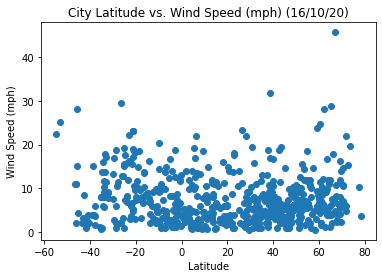

Each marker on this plot represents the Latitude and Wind Speed values of one particular city.
When all markers are plotted, the figure demononstrates the relationship betwen Latitude and Wind Speed.
Based soley on visual observation of the figure, there doesnt appear to be any visible trend. However Wind Speed appears to reach its highest values when Latitude is further from the equator.


<Figure size 432x288 with 0 Axes>

In [13]:
x_values = city_data["Latitude"]
y_values = city_data["Wind Speed (mph)"]
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Wind Speed (mph) (16/10/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig('Latitude vs Wind Speed')
print(f"Each marker on this plot represents the Latitude and Wind Speed values of one particular city.")
print(f"When all markers are plotted, the figure demononstrates the relationship betwen Latitude and Wind Speed.")
print(f"Based soley on visual observation of the figure, there doesnt appear to be any visible trend. However Wind Speed appears to reach its highest values when Latitude is further from the equator.") 

## Linear Regression

In [14]:
northern_hemisphere_df = city_data[city_data["Latitude"] >= 0]

In [15]:
southern_hemisphere_df = city_data[city_data["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.98x +94.52
The r-value is: -0.8822418066459504
The r^2 is: 0.7783506053939105
This scatter plot shows a strong negative linear relationship between Max Temperature and Latitude.


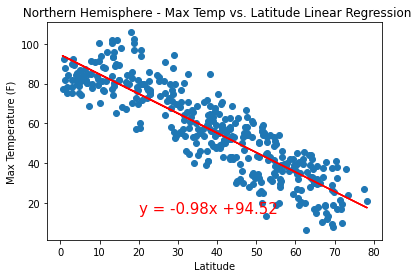

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

 # Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title(" Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r^2 is: {rvalue**2}")
print(f"This scatter plot shows a strong negative linear relationship between Max Temperature and Latitude.")
      
      
# Show plot
plt.show()
plt.savefig('Northern Hemisphere - Latitude vs Temperature')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.76x +89.79
The r-value is: 0.7350240896050348
The r^2 is: 0.5402604122997103
This scatter plot shows a moderate positive linear relationship between Max Temperature and Latitude.


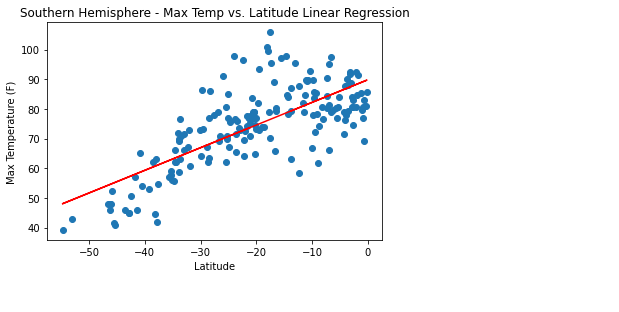

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

 # Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r^2 is: {rvalue**2}")
print(f"This scatter plot shows a moderate positive linear relationship between Max Temperature and Latitude.")
# Show plot
plt.show()
plt.savefig("Southern Hemisphere - Latitude vs Temperature")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.39x +56.55
The r-value is: 0.33520743159070604
The r^2 is: 0.11236402219363786
This scatter plot shows a weak positive linear relationship between Max Temperature and Latitude.


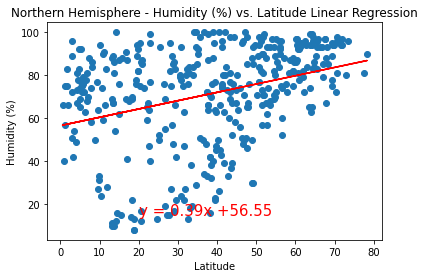

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

 # Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r^2 is: {rvalue**2}")
print(f"This scatter plot shows a weak positive linear relationship between Max Temperature and Latitude.")
# Show plot
plt.show()
plt.savefig("Northern Hemisphere - Latitude vs Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.24x +58.64
The r-value is: -0.14458601757033154
The r^2 is: 0.020905116476848222
This scatter plot shows a weak negative relationship between Humidity (%) and Latitude.


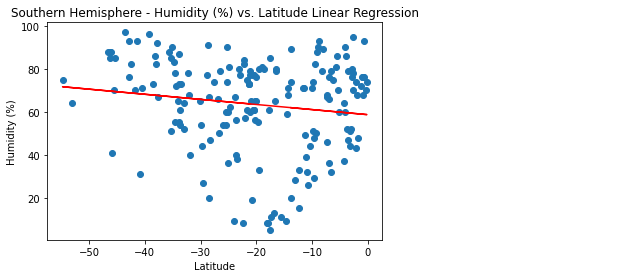

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

 # Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r^2 is: {rvalue**2}")
print(f"This scatter plot shows a weak negative relationship between Humidity (%) and Latitude.")
# Show plot
plt.show()
plt.savefig("Southern Hemisphere - Latitude vs Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.43x +43.24
The r-value is: 0.21074399500520766
The r^2 is: 0.04441303143075499
This scatter plot shows a weak positive linear relationship between Cloudiness (%) and Latitude.


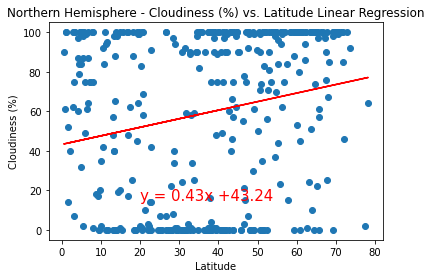

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

 # Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r^2 is: {rvalue**2}")
print(f"This scatter plot shows a weak positive linear relationship between Cloudiness (%) and Latitude.")
# Show plot
plt.show()
plt.savefig("Northern Hemisphere - Latitude vs Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.39x +56.4
The r-value is: 0.12874757107766183
The r^2 is: 0.016575937058397584
This scatter plot shows a weak positive linear relationship between Cloudiness (%) and Latitude.


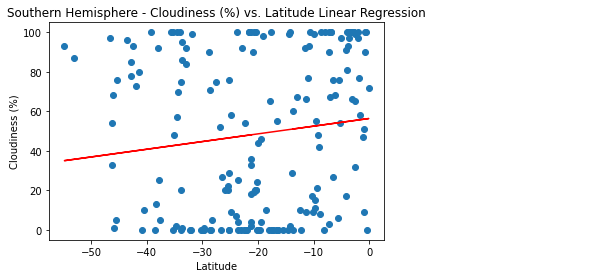

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

 # Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r^2 is: {rvalue**2}")
print(f"This scatter plot shows a weak positive linear relationship between Cloudiness (%) and Latitude.")
# Show plot
plt.show()
plt.savefig("Southern Hemisphere - Latitude vs Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.04x +5.54
The r-value is: 0.1543389840809098
The r^2 is: 0.023820522007127327
This scatter plot shows a weak positive linear relationship between Wind Speed and Latitude.


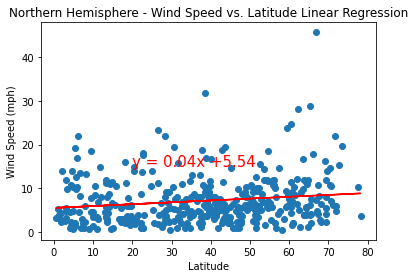

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

 # Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r^2 is: {rvalue**2}")
print(f"This scatter plot shows a weak positive linear relationship between Wind Speed and Latitude.")
# Show plot
plt.show()
plt.savefig("Northern Hemisphere - Latitude vs Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.08x +7.17
The r-value is: -0.1784261619010554
The r^2 is: 0.03183589525074163
This scatter plot shows a weak negative linear relationship between Wind Speed and Latitude.


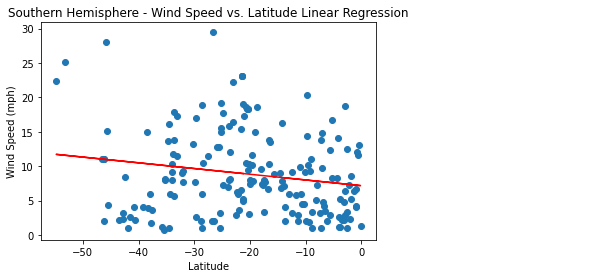

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

 # Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue}")
print(f"The r^2 is: {rvalue**2}")
print(f"This scatter plot shows a weak negative linear relationship between Wind Speed and Latitude.")
# Show plot
plt.show()
plt.savefig("Southern Hemisphere - Latitude vs Wind Speed")